In [1]:
import ugradio
import matplotlib.pylab as plt
import numpy as np
import ugradio.dft as dft

In [2]:
npz = np.load('50mV data with rain.npz')

In [3]:
splitraindata = npz['arr_0']

In [4]:
splitraindata.shape

(2, 100, 16000)

In [5]:
raindata = splitraindata[0] - (splitraindata[1] * 5/4 * 1j)
#we have real and complex data (Port A and Port B) so we have to recombine them
#amplitude of the imaginary component is undervalued by a factor of 5/4ths 
#we can confirm this 5/4ths by taking the rms of real vs imaginary and take the ratio 

In [6]:
#rms will show that there's a multiplicative factor/ offset between the imaginary and real components 

In [22]:
#this function assumes 2D FT but we only want 1D along axis of time series data
#axis = 1 makes it along time series
def powerspectra(raindata):
    rft = np.fft.fft(raindata, axis = 1)
    #calculating FFT
    rfrequency = np.fft.fftfreq(raindata.shape[1], 1/ 62.5e6)
    #calculating frequency, first input is time series and second is 1/ sampling freq
    #you can split 16000 by 2000 sets so 8 blocks to average over and reduce noise
    #however this will decrease spectral resolution, maybe only stick to 2000 or 4000
    rpspectra = abs(rft)**2
    return np.fft.fftshift(rfrequency), np.fft.fftshift(rpspectra, axes = 1)
    #arrays are shifted since positive comes first and then imaginary

In [23]:
raindata.shape = (-1, 2000)

In [24]:
a, b = powerspectra(raindata)

In [25]:
avgraindata = np.mean(b, axis = 0)

<IPython.core.display.Javascript object>


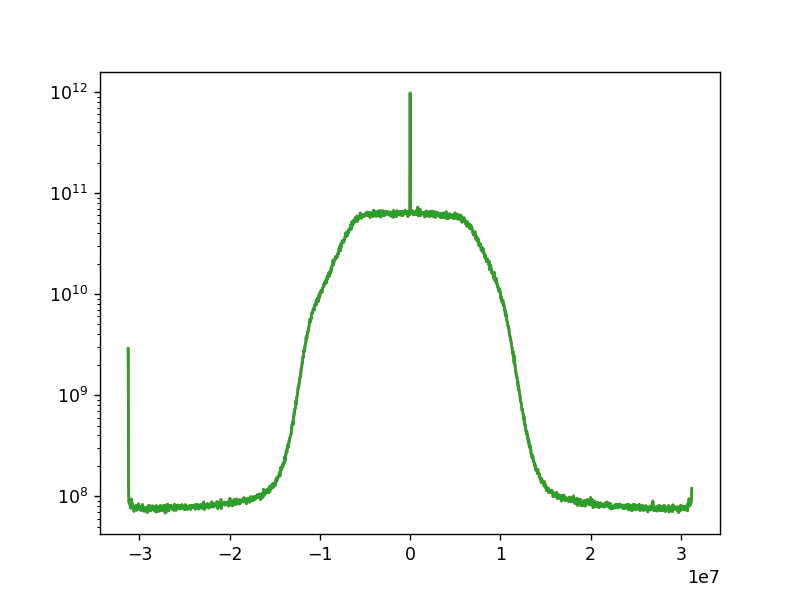

In [27]:
%matplotlib notebook
plt.plot(a + 1230 + 190.4, avgraindata)
plt.yscale('log')
#this is shifted over with mixers so we have to add the frequencies to the two mixers to the frequency axis 
#filter 1 is 1230 MHz and filter 2 is 190.4 MHz 
#peak is just an artifact of fft, it's nothing physical
#tiny peak to the side is our hydrogen line!

In [11]:
coldnpz = np.load('50mV cold data.npz')

In [12]:
splitcolddata = npz['arr_0']

In [13]:
colddata = splitcolddata[0] - (splitcolddata[1] * 5/4 * 1j)

In [34]:
def powerspectra(colddata):
    cft = np.fft.fft(colddata, axis = 1)
    #calculating FFT
    cfrequency = np.fft.fftfreq(colddata.shape[1], 1/ 62.5e6)
    #calculating frequency, first input is time series and second is 1/ sampling freq
    cpspectra = abs(cft)**2
    return np.fft.fftshift(cfrequency), np.fft.fftshift(cpspectra, axes = 1)
    #arrays are shifted since positive comes first and then imaginary

In [35]:
colddata.shape = (-1, 2000)

In [36]:
c, d = powerspectra(colddata)

In [37]:
avgcolddata = np.mean(d, axis = 0)

<IPython.core.display.Javascript object>


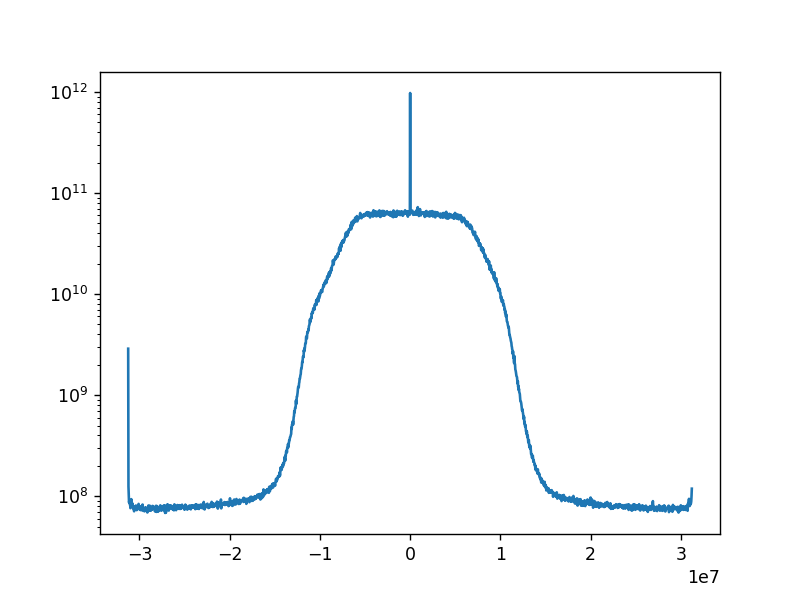

In [38]:
plt.plot(a + 1230 + 190.4, avgcolddata)
plt.yscale('log')

In [18]:
#rain and cold are for calibrating, main data is when galactic center is overhead (the more data the clearer it'll look)
#500-1000 samples is okay, 500 you can still see H1 bump 

In [20]:
from astropy.coordinates import EarthLocation, SkyCoord
#can use this to plan out observations and determine what's overhead
#don't necessarily need galactic center but should look at plane of galaxy to find hydrogen blob to observe 